In [9]:
import imp # for reloading modules
import matplotlib.pyplot as plt # for plotting

import utils # for loading data
imp.reload(utils)

<module 'utils' from 'c:\\Users\\Christine Lagorce\\Desktop\\X M2\\ComputerVision\\utils.py'>

In [10]:
labels = utils.get_annotations('Data/data1/annotations')
images = utils.get_images('Data/data1/images')

Loading annotations...
Loading images...


c:\Users\Christine Lagorce\Desktop\X M2\ComputerVision\utils.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return images


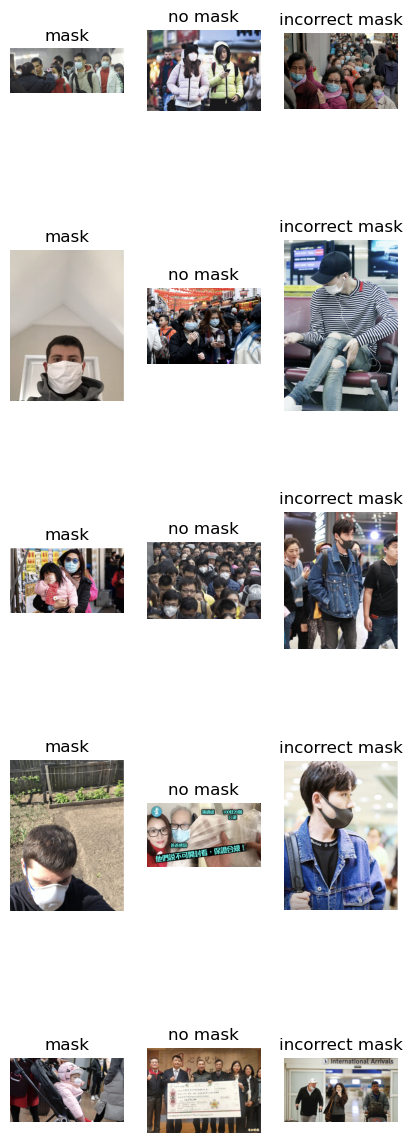

In [22]:
#we plot the first 8 images for each of the 10 class

#we set the figure size to 10x10

fig, axis = plt.subplots(5, 3, figsize=(5, 16))

progress = [0,0,0]

for i in range(len(labels)):
    label = labels[i]
    
    if label == 'with_mask':
        label = 'mask'
        id = 0
    elif label == 'without_mask':
        label = "no mask"
        id = 1
    else:
        label = 'incorrect mask'
        id = 2
        
    value = images[i]

    if progress[id] < 5:
        axis[progress[id], id].imshow(value)
        axis[progress[id], id].set_title(label)
        axis[progress[id], id].axis('off')
        
        progress[id] += 1 

In [ ]:
# it is intresting to note a few things:
# the images are not all the same size
# For the "without_mask" class, the label reffers to one person on the image (even if it's one person in a masked crowed)

Text(0.5, 1.0, 'Repartition of the classes')

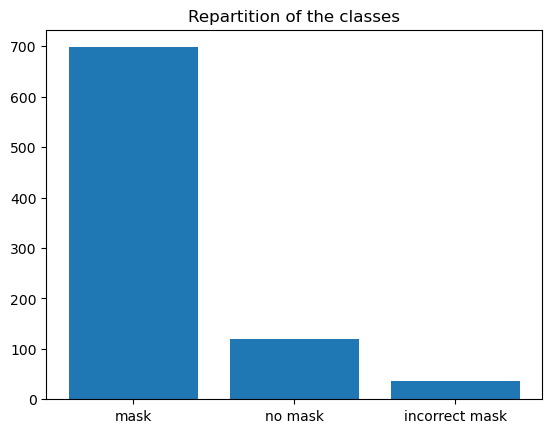

In [29]:
#we want to see the repartion of the classes 
repartition = [0,0,0]
for label in labels:
    if label == 'with_mask':
        repartition[0] += 1
    elif label == 'without_mask':
        repartition[1] += 1
    else:
        repartition[2] += 1

#we plot an histogram of the repartion
plt.bar(['mask', 'no mask', 'incorrect mask'], repartition)
plt.title('Repartition of the classes')

In [ ]:
#we also note that the classes are not balanced 
#it could be a problem for the training of the model because it could be biased towards the class with the most images
#if we have problem with the training, we could try to balance the classes by adding more images to the "no mask" classe
#by data augmentation (we could rotate the images, change the brightness, etc...)